<a href="https://colab.research.google.com/github/Ridhima-Dahiya/AirQualityPrediction/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression,BayesianRidge,ARDRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score #import mean squared error and mean absolute error
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #IMPORT GRID SEARCH CV
from sklearn import tree                                  #impoRT TREE
from sklearn.ensemble import AdaBoostRegressor            # IMPORT ADABOOST
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor

# load file

In [ ]:
from google.colab import files
uplaod=files.upload()

Saving NEW1.csv to NEW1.csv


## change filename

In [ ]:
#dataset = pd.read_csv('PREVo3.csv',date_parser=True)
df_air=pd.read_csv('NEW1.csv',date_parser=True)
#df_air.dtypes
#df_air.shape
#df_air.describe()

In [ ]:
df_air['Date']=pd.to_datetime(df_air.date, dayfirst= True)   #Format date column
df_air.columns
df_air.dtypes

AttributeError: ignored

In [ ]:
df_air.set_index('date',inplace=True)
df_air.head()
#df_air['MONTH']=df_air.index.month     #Create month column (Run once)
#df_air.reset_index(inplace=True)


KeyError: ignored

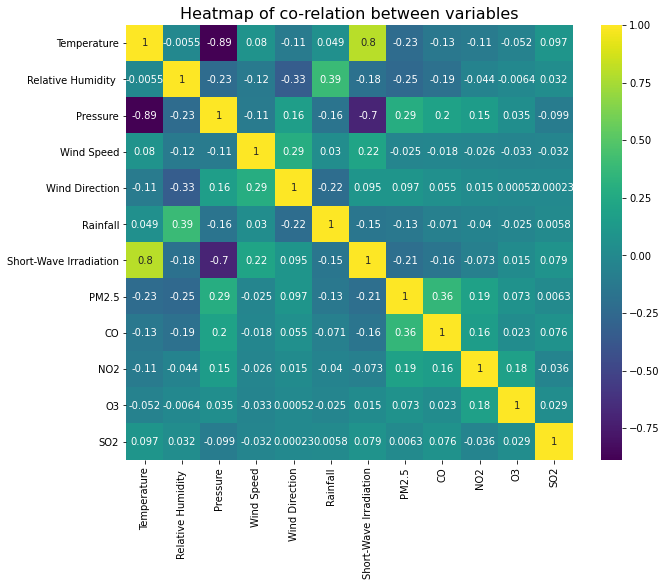

In [ ]:
#Use heatmap to see corelation between variables
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# change name

In [ ]:
#plot all X-features against output variable pmi
col_=df_air.columns.tolist()[:]
for i in df_air.columns.tolist()[:]:
    sns.lmplot(x=i,y='o3i',data=df_air,markers='.')

# **CHANGE VALUE HERE**

In [ ]:
X=df_air[col_].drop('pmi',1)     #X-input features
y=df_air['pmi']                 #y-input features
ss=StandardScaler()              #initiatilise
X_std=ss.fit_transform(X)     #apply stardardisation
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=0,shuffle= False)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

## **LINEAR REGRESSION MODEL**

In [ ]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of LINEAR REGRESSION  model:',rmse)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred)
print(r2)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Roc Curve 1')
plt.legend(loc='best')
plt.show()

# **BAYESIAN RIDGE**

In [ ]:
lr_2=BayesianRidge()
lr_2_model=lr_2.fit(X_train,y_train)          #fit the linear model on train data
y_pred_lr=lr_2_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))      #calculate rmse
print('Baseline RMSE of LINEAR REGRESSION  model:',rmse)
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_lr)
print(r2)

# **ARD REGRESSION**

In [ ]:
lr_3=ARDRegression()
lr_3_model=lr_3.fit(X_train,y_train)          #fit the linear model on train data
y_pred_lr_3=lr_3_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr_3))      #calculate rmse
print('Baseline RMSE of LINEAR REGRESSION  model:',rmse)
mse=mean_squared_error(y_test,y_pred_lr_3)
mae=mean_absolute_error(y_test,y_pred_lr_3)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_lr_3)
print(r2)

# **decision tree grid search cv**

In [ ]:
dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)  #define rf parameters
df_params={'max_depth':[2,10],'max_leaf_nodes':[70,90]}
#define rf grid search
dt_grid=GridSearchCV(dt_one_reg,df_params,cv=10)
dt_model_two=dt_grid.fit(X_train,y_train)
y_pred_dt_two=dt_model_two.predict(X_test)
#Calculate RMSE
print('RMSE using dt grid search method',np.sqrt(mean_squared_error(y_test,y_pred_dt_two)))
mse=mean_squared_error(y_test,y_pred_dt_two)
mae=mean_absolute_error(y_test,y_pred_dt_two)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_dt_two)
print(r2)


bagging **regressor**

In [ ]:
#regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                         # n_estimators=200)
params_a = {'n_estimators': 100}
reg_a_adb = ensemble.BaggingRegressor(**params_a)
reg_a_adb.fit(X_train, y_train)
y_a_adb = reg_a_adb.predict(X_test)
print('RMSE using ada boost method',np.sqrt(mean_squared_error(y_test,y_a_adb)))
mse=mean_squared_error(y_test,y_a_adb)
mae=mean_absolute_error(y_test,y_a_adb)

print(mse)
print(mae)
r2=r2_score(y_test,y_a_adb)
print(r2)

**extra trees regressor**

In [ ]:
params_b = {'n_estimators': 100,'max_depth':5}
reg_b_adb = ensemble.ExtraTreesRegressor(**params_b)
reg_b_adb.fit(X_train, y_train)
y_b_adb = reg_b_adb.predict(X_test)
print('RMSE using ada boost method',np.sqrt(mean_squared_error(y_test,y_b_adb)))
mse=mean_squared_error(y_test,y_b_adb)
mae=mean_absolute_error(y_test,y_b_adb)

print(mse)
print(mae)
r2=r2_score(y_test,y_b_adb)
print(r2)

# **adaboost**

In [ ]:
#regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                         # n_estimators=200)
params_1 = {'n_estimators': 100,
          'learning_rate': 0.01,}
reg_2_adb = AdaBoostRegressor(**params_1)
reg_2_adb.fit(X_train, y_train)
y_2_adb = reg_2_adb.predict(X_test)
print('RMSE using ada boost method',np.sqrt(mean_squared_error(y_test,y_2_adb)))
mse=mean_squared_error(y_test,y_2_adb)
mae=mean_absolute_error(y_test,y_2_adb)

print(mse)
print(mae)
r2=r2_score(y_test,y_2_adb)
print(r2)

# **gradient** boosting

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'lad'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
print('RMSE using ada boost method',np.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
mse=mean_squared_error(y_test,reg.predict(X_test))
mae=mean_absolute_error(y_test,reg.predict(X_test))
print(mse)
print(mae)
r2=r2_score(y_test,reg.predict(X_test))
print(r2)

# MLP

In [ ]:
reg_m = MLPRegressor()
reg_m.fit(X_train, y_train)
mlp_params= [{'hidden_layer_sizes':[50,100,200,500]}]        #define rf parameters
mlp_grid=GridSearchCV(reg_m,mlp_params,cv=10)                                           #define rf grid search
mlp_model_two=mlp_grid.fit(X_train,y_train)
y_pred_mlp=mlp_model_two.predict(X_test)
print('RMSE using ada boost method',np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
mse=mean_squared_error(y_test,y_pred_mlp)
mae=mean_absolute_error(y_test,y_pred_mlp)
print(mlp_model_two.best_params_)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_mlp)
print(r2)

# **random forest grid search cv**

In [ ]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)
rf_params={'n_estimators':[200,300],'max_depth':[2,4,5],'max_leaf_nodes':[70,90]}         #define rf parameters
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)                                           #define rf grid search
rf_model_two=rf_grid.fit(X_train,y_train)                           #fit the model wtih all grid parameters
y_pred_rf_two=rf_model_two.predict(X_test)                             #predict
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))
mse=mean_squared_error(y_test,y_pred_rf_two)
mae=mean_absolute_error(y_test,y_pred_rf_two)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_rf_two)
print(r2)

# svr grid search cv

In [ ]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()
sv_model=sv_reg.fit(X_train,y_train)
params={'kernel':['rbf','linear','poly','sigmoid'],'C':[0.1,0.5,10],'gamma':['auto']}         #define rf parameters
sv_grid=GridSearchCV(sv_reg,params,cv=10)                                           #define rf grid search
sv_model_two=sv_grid.fit(X_train,y_train)                           #fit the model wtih all grid parameters
y_pred_sv_two=sv_model_two.predict(X_test)                             #predict
print('rmse,mse,mae')
print(np.sqrt(mean_squared_error(y_test,y_pred_sv_two)))
mse=mean_squared_error(y_test,y_pred_sv_two)
mae=mean_absolute_error(y_test,y_pred_sv_two)
print(mse)
print(mae)
r2=r2_score(y_test,y_pred_sv_two)
print(r2)

In [ ]:
# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test),  y_test,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

In [ ]:
# Visualising the SVR results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(y_test, regressor.predict(X), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_linear_regression
import numpy as np

X = y_pred

y = y_test

intercept, slope, corr_coeff = plot_linear_regression(X, y)
plt.show()

In [ ]:
plt.y_pred